In [ ]:
#! conda install -c conda-forge -y geopandas

# 1. Comparing Heights of People over the Years in Netherlands and China

In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import geopandas as gpd

In [13]:
world_height = pd.read_csv('world_height.csv')

In [14]:
world_height.head()

,Entity,Code,Year,height
0,Afghanistan,AFG,1870,168.4
1,Afghanistan,AFG,1880,165.7
2,Afghanistan,AFG,1930,166.8
3,Albania,ALB,1880,170.1
4,Albania,ALB,1890,169.8


In [15]:
world_height_by_name = world_height.groupby('Entity')
world_height_by_name.describe().head()

Year                                                          \
            count         mean        std     min     25%     50%     75%   
Entity                                                                      
Afghanistan   3.0  1893.333333  32.145503  1870.0  1875.0  1880.0  1905.0   
Albania       3.0  1890.000000  10.000000  1880.0  1885.0  1890.0  1895.0   
Algeria       3.0  1920.000000  10.000000  1910.0  1915.0  1920.0  1925.0   
Angola        7.0  1891.428571  39.761192  1810.0  1885.0  1900.0  1915.0   
Argentina    15.0  1880.000000  44.721360  1810.0  1845.0  1880.0  1915.0   

                    height                                              \
                max  count        mean       std    min     25%    50%   
Entity                                                                   
Afghanistan  1930.0    3.0  166.966667  1.357694  165.7  166.25  166.8   
Albania      1900.0    3.0  169.700000  0.458258  169.2  169.50  169.8   
Algeria      1930.0    3.0  168.000000  1.562050  166.2  167.50  168.8   
Angola       1930.0    7.0  166.700000  2.979374  160.5  166.20  168.0   
Argentina    1950.0   15.0  168.940000  1.242578  167.4  167.85  168.8   

                            
                75%    max  
Entity                      
Afghanistan  167.60  168.4  
Albania      169.95  170.1  
Algeria      168.90  169.0  
Angola       168.45  169.1  
Argentina    169.85  170.9

In [16]:
world_height_by_name.size().sort_values(ascending=False).head()

Entity
China             18
United Kingdom    18
Brazil            18
Italy             18
France            18
dtype: int64

## Compare Heights

After 1830, Netherlanders heights increased. 1890 to 1920 China had a dip in population. After 1920, China's population increased.
China has lesser spread of heights than Netherlands. On average, Chinese people are shorter than Netherlanders.

### Netherlands

* max height - `182.7` in `1980`
* mean - `171.7`
* std - `6.53`

### China

* max height - `171` in `1980`
* mean - `166.56`
* std `2.21`

In [28]:
netherlands_df = world_height[world_height['Entity'] == 'Netherlands']
china_df = world_height[world_height['Entity'] == 'China']
china_df.head()

,Entity,Code,Year,height
217,China,CHN,1810,165.7
218,China,CHN,1820,165.8
219,China,CHN,1830,165.8
220,China,CHN,1840,166.2
221,China,CHN,1850,166.2


In [29]:
netherlands_and_china_df = pd.concat([netherlands_df, china_df])
netherlands_heights = netherlands_and_china_df[netherlands_and_china_df['Entity'] == 'Netherlands']['height']
china_heights = netherlands_and_china_df[netherlands_and_china_df['Entity'] == 'China']['height']

descriptions = pd.DataFrame({
        'Netherlands': [
            netherlands_heights.count(),
            netherlands_heights.mean(),
            netherlands_heights.std(),
            netherlands_heights.min(),
            np.percentile(netherlands_heights, 25, axis=0),
            np.percentile(netherlands_heights, 50, axis=0),
            np.percentile(netherlands_heights, 75, axis=0),
            netherlands_heights.max()
        ],
        'China': [
            china_heights.count(),
            china_heights.mean(),
            china_heights.std(),
            china_heights.min(),
            np.percentile(china_heights, 25, axis=0),
            np.percentile(china_heights, 50, axis=0),
            np.percentile(china_heights, 75, axis=0),
            china_heights.max()
        ]
})
#descriptions = descriptions.append({column:netherlands_and_china_df[netherlands_and_china_df['Entity'] == column].median() for column in columns}, ignore_index=True)
descriptions.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
descriptions

,China,Netherlands
count,18.000000,18.000000
mean,166.555556,171.727778
std,2.208865,6.532796
min,164.000000,164.200000
25%,165.400000,166.125000
50%,165.800000,170.150000
75%,167.175000,176.650000
max,171.500000,182.700000


In [9]:
def plt_heights(df, title):
    plt.figure(figsize=(10,5))
    plt.plot(df['Year'], df['height'])
    plt.xticks(np.arange(min(df['Year']), max(df['Year'])+1, 10))
    plt.xlabel('year')
    plt.ylabel('height (in)')
    plt.title(title)
    plt.show

In [10]:
plt_heights(netherlands_df, 'Netherlanders Heights over the Years')

NameError: name 'netherlands_df' is not defined

### Netherlands - Notable Years

| year | description | expect population growth to... |
| ---- | ----------- | ----------------------- |
|`1810`| Napoleon invaded the Netherlands and annexed them to France | `decrease` |
|`1922` | Dutch women received right to vote | `increase` |
| `1940` | Germany invaded Netherlands | `decrease` |

In [11]:
plt_heights(china_df, 'Chinese Heights over the Years')

NameError: name 'china_df' is not defined

### China - Notable Years

| year | description | expect population growth to... |
| ---- | ----------- | ----------------------- |
|`1894-1895`| Sino-Japanese war | `decrease` |
|`1911` | "warlord period", collapse of the dynastic system | `decrease` |
| `1921` | Chinese Communist Party formed, began mobilizing farmers | `increase` |
|`1966 to 1970` | Cultural Revolution, Red Guards killed innocent people | `decrease` |

## 2. Average Heights Every Year

In [84]:
netherlands_df

,Entity,Code,Year,height
795,Netherlands,NLD,1810,166.0
796,Netherlands,NLD,1820,165.1
797,Netherlands,NLD,1830,164.2
798,Netherlands,NLD,1840,164.5
799,Netherlands,NLD,1850,165.3
800,Netherlands,NLD,1860,166.5
801,Netherlands,NLD,1870,167.1
802,Netherlands,NLD,1880,168.5
803,Netherlands,NLD,1890,169.4
804,Netherlands,NLD,1900,170.9


In [85]:
china_df

,Entity,Code,Year,height
217,China,CHN,1810,165.7
218,China,CHN,1820,165.8
219,China,CHN,1830,165.8
220,China,CHN,1840,166.2
221,China,CHN,1850,166.2
222,China,CHN,1860,165.7
223,China,CHN,1870,165.8
224,China,CHN,1880,165.3
225,China,CHN,1890,164.0
226,China,CHN,1900,164.0


## 3. How spread out are the heights between countries

In [86]:
netherlands_df['height'].std()

6.532795596117604

In [87]:
china_df['height'].std()

2.2088650858122283

In [88]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df = pd.read_csv('world_height.csv')

In [89]:
merged = world.merge(df, left_on='iso_a3', right_on='Code')

In [90]:
merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Entity,Code,Year,height
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",Afghanistan,AFG,1870,168.4
1,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",Afghanistan,AFG,1880,165.7
2,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",Afghanistan,AFG,1930,166.8
3,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,Angola,AGO,1810,160.5
4,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,Angola,AGO,1880,168.8


In [91]:
merged_copy = merged.copy()
china_merged = merged_copy[merged_copy['name'] == 'China']
netherlands_merged = merged[merged['name'] == 'Netherlands']

In [92]:
china_merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Entity,Code,Year,height
183,1.338613e+09,Asia,China,CHN,7973000.0,(POLYGON ((110.3391878601516 18.67839508714761...,China,CHN,1810,165.7
184,1.338613e+09,Asia,China,CHN,7973000.0,(POLYGON ((110.3391878601516 18.67839508714761...,China,CHN,1820,165.8
185,1.338613e+09,Asia,China,CHN,7973000.0,(POLYGON ((110.3391878601516 18.67839508714761...,China,CHN,1830,165.8
186,1.338613e+09,Asia,China,CHN,7973000.0,(POLYGON ((110.3391878601516 18.67839508714761...,China,CHN,1840,166.2
187,1.338613e+09,Asia,China,CHN,7973000.0,(POLYGON ((110.3391878601516 18.67839508714761...,China,CHN,1850,166.2


<IPython.core.display.Javascript object>


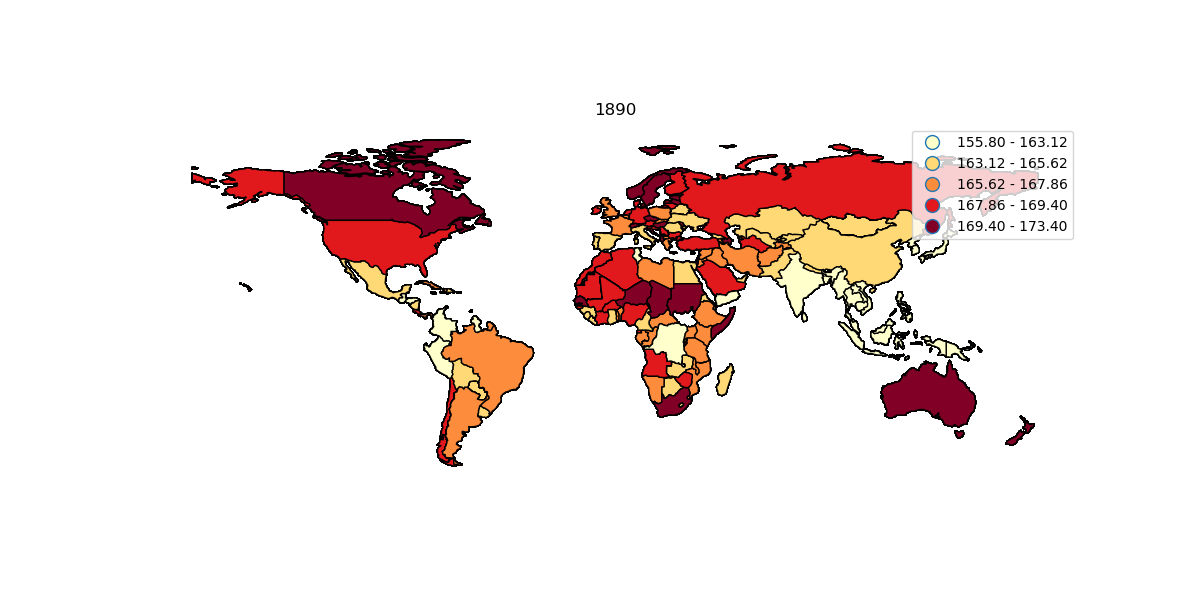

In [96]:
TWO_SECONDS = 2000
TEN_YEARS = 10
MIN_YEAR = merged['Year'].min()
MAX_YEAR = merged['Year'].max()
NUM_FRAMES = (MAX_YEAR - MIN_YEAR) // TEN_YEARS

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_aspect('equal')
ax.set_axis_off()

cmap = plt.cm.YlOrRd
cmap.set_bad('white',1.)

current_year = MIN_YEAR

def init(): 
    plt.title(current_year)
    return merged[merged['Year'] == current_year].plot(ax=ax, 
                       column='height',
                       cmap=cmap,
                       scheme='quantiles',
                       edgecolor='black',
                       legend=True)

def animate(i):
    current_year = MIN_YEAR + (i+1)*TEN_YEARS
    plt.title(current_year)
    return merged[merged['Year'] == current_year].plot(ax=ax,
                                                       column='height',
                                                       cmap=cmap,
                                                       scheme='quantiles',
                                                       edgecolor='black',
                                                       legend=True)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=NUM_FRAMES, interval=TWO_SECONDS, blit=False)

plt.show()

In [21]:
plt.close(fig)

## 4. What is the distribution of countries heights over time? 

* Does the spread grow larger as you move forward in the arrow of time? Or smaller? (use the center and spread to talk about this)

In [22]:
# add each country then divide by total for that year
world_height.head()

,Entity,Code,Year,height
0,Afghanistan,AFG,1870,168.4
1,Afghanistan,AFG,1880,165.7
2,Afghanistan,AFG,1930,166.8
3,Albania,ALB,1880,170.1
4,Albania,ALB,1890,169.8


In [23]:
years = list(set(world_height['Year']))

stds = []
averages = []
for year in years:
    grouped_by_year = world_height[world_height['Year'] == year]
    average_for_year = np.mean(grouped_by_year['height'])
    std_for_year = np.std(grouped_by_year['height'])
    averages.append(average_for_year)
    stds.append(std_for_year)

<IPython.core.display.Javascript object>


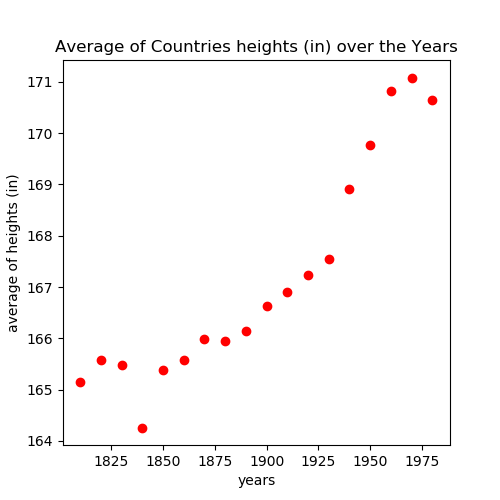

In [24]:
plt.figure(figsize=(5,5))
plt.ylabel('average of heights (in)')
plt.xlabel('years')
plt.title('Average of Countries heights (in) over the Years')
plt.plot(years, averages, 'ro')
plt.show()

The average height for all countries is generally increasing, though in recent years it seems like the heights are leveling out. The average height curve looks sinusoidal. I expect in future years, the standard deviation and the increase in height over the years to stabilize as people that are too tall tend to have health problems.

<IPython.core.display.Javascript object>


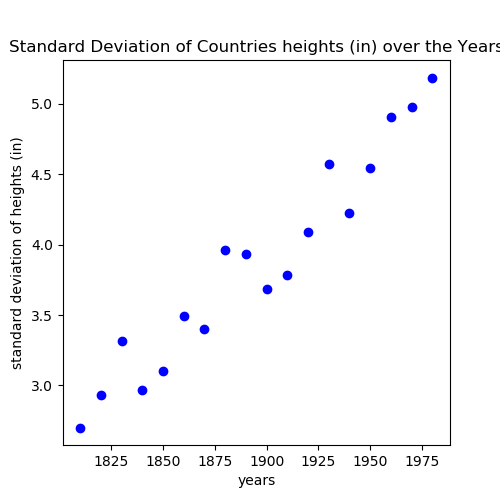

In [25]:
plt.figure(figsize=(5,5))
plt.ylabel('standard deviation of heights (in)')
plt.xlabel('years')
plt.title('Standard Deviation of Countries heights (in) over the Years')
plt.plot(years, stds, 'bo')
plt.show()

The spread of heights is linearly increasing over time.